# Kim Assignment 3

In [85]:
import matplotlib.pyplot as plt
from pyomo.environ import *
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

## Problem 1

x1: 3.1578947421867434

x2: 2.947368427733429

In [8]:


model = ConcreteModel()

model.x1 = Var()
model.x2 = Var()

def objfunc(m):
    return (4*m.x1 + 2*m.x2 - 0.5*m.x1**2 - 0.25*m.x2**2)

model.obj = Objective(rule=objfunc, sense=maximize)

def constraint1(m):
    return (model.x1*8000 + model.x2*5000 <= 40000)


model.constraint1 = Constraint(rule=constraint1)

solver = SolverFactory('ipopt',executable='/dir/to/install/bin/ipopt')
solver.solve(model, tee=True)


print('*** Solution *** :')
print('x1:', value(model.x1))
print('x2:', value(model.x2))

Ipopt 3.14.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.12, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number

## Problem 2

a = 20

b = 20

c = 20

The answer matches expectations that an equilateral triangle maximizes volume

In [12]:

model = ConcreteModel()

model.a = Var(domain=PositiveIntegers)
model.b = Var(domain=PositiveIntegers)
model.c = Var(domain=PositiveIntegers)

def objfunc(m):
    p = m.a + m.b + m.c #perimeter
    return (sqrt(p*((p-m.a)*(p-m.b)*(p-m.c))))

model.obj = Objective(rule=objfunc, sense=maximize)

def constraint1(m):
    return (model.a + model.b + model.c <= 60)

def constraint2(m):
    return (model.a <= model.b + model.c)

def constraint3(m):
    return (model.b <= model.a + model.c)

def constraint4(m):
    return (model.c <= model.a + model.b)


model.constraint1 = Constraint(rule=constraint1)
model.constraint2 = Constraint(rule=constraint2)
model.constraint3 = Constraint(rule=constraint3)
model.constraint4 = Constraint(rule=constraint4)

solver = SolverFactory('ipopt',executable='/dir/to/install/bin/ipopt')
solver.solve(model, tee=True)


print('*** Solution *** :')
print('a:', value(model.a))
print('b:', value(model.b))
print('c:', value(model.c))

Ipopt 3.14.12: 
==> Warning: Treating 0 binary and 3 integer variables as continuous.


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.12, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       12
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total

## Problem 3

$t_{1}$ = tiny tank

$t_{2}$ = tiny truck

$t_{3}$ = tiny turtle

Objective Function (Listed in order of priority):

Maximize (Hours worked while <= 40):

$2t_{1} + 2t_{2} + 1t_{3} + \eta_{1} - \rho_{1}$

Minimize (Weekly Supply and Budget):

$2*(1.5t_{1} + 2.0t_{2} + 1.0t_{3}) + (0.3t_{1} + 0.6t_{2}) + (0.5t_{1} + 0.5t_{2} + 1.0t_{3}) + \eta_{2} - \rho_{2}$ 

$7t_{1} + 5t_{2} + 4t_{3} + \eta_{3} - \rho_{3}$ 


Subject to:

**Labor**

$2t_{1} + 2t_{2} + 1t_{3} + \eta_{4} - \rho_{4} = 40$ - Note we use = because we want to cap this out as priority #1 to use up all the labor 

**Materials**
$1.5t_{1} + 2.0t_{2} + 1.0t_{3} + \eta_{5} - \rho_{5}<= 16000$  Plastic Supply

$0.3t_{1} + 0.6t_{2} + \eta_{6} - \rho_{6}<= 9000$  Metal Supply

$0.5t_{1} + 0.5t_{2} + 1.0t_{3} + \eta_{7} - \rho_{7}<= 5000$  Rubber Supply 

**Manufacturing Cost**

$7t_{1} + 5t_{2} + 4t_{3} + \eta_{8} - \rho_{8}<= 164000$  

**Non-negativity**

$t_{1}, t_{2}, t_{3} >= 0$

$\eta_{i},\rho_{i} >= 0$ for all $i$


## Problem 4

$t$ = tv buys

$r$ = radio buys

Objective Function:


Subject to:

$1000*(10000t + 7500r) <= 100,000$

## Problem 5

**Part A**

Based on the results of our model we can see that:

The SSE =  208000.003839951
Slope = 49.81666662666677
Y-Intercept = 4165.33333693338

Using our prediction function with those values we predict that at 120 hours we will get a predicted revenue of $10,143.33

In [92]:
# set our base lists for later
hours_of_operation = [40, 44, 48, 48, 60 ,70 ,72, 90, 100, 168]

average_revenue = [5958, 6662, 6004, 6011, 7250, 8632, 6964, 11097, 9107, 11498]

In [83]:
#linear

model = ConcreteModel()

model.r1 = Var(bounds=(40, 200))
model.r2 = Var(bounds=(40, 200))
model.r3 = Var(bounds=(40, 200))
model.r4 = Var(bounds=(40, 200))
model.r5 = Var(bounds=(40, 200))
model.r6 = Var(bounds=(40, 200))
model.r7 = Var(bounds=(40, 200))
model.r8 = Var(bounds=(40, 200))
model.r9 = Var(bounds=(40, 200))
model.r10 = Var(bounds=(40, 200))
model.x = Var(domain=PositiveIntegers)
model.y = Var(domain=PositiveIntegers)

def objfunc(m):
    return (m.r1**2 + m.r2**2 + m.r3**2 + m.r4**2 + m.r5**2 + m.r6**2 + m.r7**2 + m.r8**2 + m.r9**2 +m.r10**2)

model.obj = Objective(rule=objfunc, sense=minimize)

def constraint1(m):
    return ((40*model.x + model.y )- 5958 == model.r1)

def constraint2(m):
    return ((44*model.x + model.y) - 6662 == model.r2)

def constraint3(m):
    return ((48*model.x + model.y) - 6004 == model.r3)

def constraint4(m):
    return ((48*model.x + model.y) - 6011 == model.r4)

def constraint5(m):
    return ((60*model.x + model.y) - 7250 == model.r5)

def constraint6(m):
    return ((70*model.x + model.y) - 8632 == model.r6)

def constraint7(m):
    return ((72*model.x + model.y) - 6964 == model.r7)

def constraint8(m):
    return ((90*model.x + model.y) - 11097 == model.r8)

def constraint9(m):
    return ((100*model.x + model.y) - 9107 == model.r9)

def constraint10(m):
    return ((168*model.x + model.y) - 11498 == model.r10)


model.constraint1 = Constraint(rule=constraint1)
model.constraint2 = Constraint(rule=constraint2)
model.constraint3 = Constraint(rule=constraint3)
model.constraint4 = Constraint(rule=constraint4)
model.constraint5 = Constraint(rule=constraint5)
model.constraint6 = Constraint(rule=constraint6)
model.constraint7 = Constraint(rule=constraint7)
model.constraint8 = Constraint(rule=constraint8)
model.constraint9 = Constraint(rule=constraint9)
model.constraint10 = Constraint(rule=constraint10)


solver = SolverFactory('ipopt',executable='/dir/to/install/bin/ipopt')
solver.solve(model, tee=True)


print('*** Solution *** :')
print('obj value', model.obj())
print('slope:', value(model.x))
print('intercept:', value(model.y))


Ipopt 3.14.12: 
==> Warning: Treating 0 binary and 2 integer variables as continuous.


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.12, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       30
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:       12
                     variables with only lower bounds:        2
                variables with lower and upper bounds:       10
                     variables with only upper bounds:        0
Total

(0.0, 180.0)

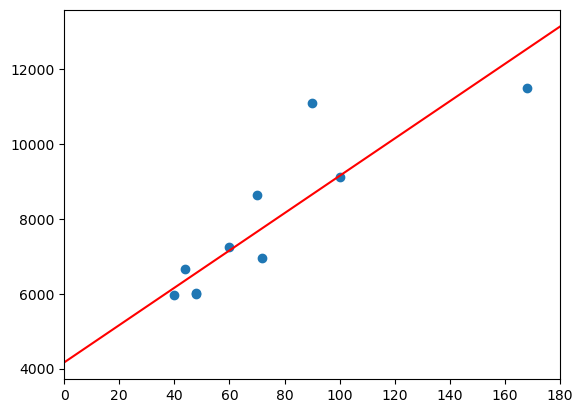

In [88]:
def nlp_linear_predictor(x):
    y = value(model.x) * x + value(model.y)
    return y


plt.scatter(hours_of_operation,average_revenue)
plt.plot([0,180],[nlp_linear_predictor(0),nlp_linear_predictor(180)],color='r')
plt.xlim(0,180)

In [121]:
#nonlinear

model2 = ConcreteModel()

model2.r1 = Var(bounds=(40, 200))
model2.r2 = Var(bounds=(40, 200))
model2.r3 = Var(bounds=(40, 200))
model2.r4 = Var(bounds=(40, 200))
model2.r5 = Var(bounds=(40, 200))
model2.r6 = Var(bounds=(40, 200))
model2.r7 = Var(bounds=(40, 200))
model2.r8 = Var(bounds=(40, 200))
model2.r9 = Var(bounds=(40, 200))
model2.r10 = Var(bounds=(40, 200))
model2.x = Var(domain=PositiveIntegers)
model2.y = Var(domain=PositiveIntegers)

def objfunc2(m):
    return (m.r1**2 + m.r2**2 + m.r3**2 + m.r4**2 + m.r5**2 + m.r6**2 + m.r7**2 + m.r8**2 + m.r9**2 +m.r10**2)

model2.obj = Objective(rule=objfunc2, sense=minimize)

def constraint1(m):
    return (model2.x * (40**model2.y)- 5958 == model2.r1)

def constraint2(m):
    return (model2.x * (44** model2.y) - 6662 == model2.r2)

def constraint3(m):
    return (model2.x * (48** model2.y) - 6004 == model2.r3)

def constraint4(m):
    return (model2.x * (48** model2.y) - 6011 == model2.r4)

def constraint5(m):
    return (model2.x * (60** model2.y) - 7250 == model2.r5)

def constraint6(m):
    return (model2.x * (70** model2.y) - 8632 == model2.r6)

def constraint7(m):
    return (model2.x * (72** model2.y) - 6964 == model2.r7)

def constraint8(m):
    return (model2.x * (90** model2.y) - 11097 == model2.r8)

def constraint9(m):
    return (model2.x * (100** model2.y) - 9107 == model2.r9)

def constraint10(m):
    return (model2.x * (168** model2.y) - 11498 == model2.r10)


model2.constraint1 = Constraint(rule=constraint1)
model2.constraint2 = Constraint(rule=constraint2)
model2.constraint3 = Constraint(rule=constraint3)
model2.constraint4 = Constraint(rule=constraint4)
model2.constraint5 = Constraint(rule=constraint5)
model2.constraint6 = Constraint(rule=constraint6)
model2.constraint7 = Constraint(rule=constraint7)
model2.constraint8 = Constraint(rule=constraint8)
model2.constraint9 = Constraint(rule=constraint9)
model2.constraint10 = Constraint(rule=constraint10)


solver = SolverFactory('ipopt',executable='/dir/to/install/bin/ipopt')
solver.solve(model2, tee=True)


print('*** Solution *** :')
print('obj value', model2.obj())
print('a:', value(model2.x))
print('b:', value(model2.y))


Ipopt 3.14.12: 
==> Warning: Treating 0 binary and 2 integer variables as continuous.


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.12, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       30
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       12
                     variables with only lower bounds:        2
                variables with lower and upper bounds:       10
                     variables with only upper bounds:        0
Total

In [107]:
def nlp_power_predictor(x):
    y = (value(model2.x) * x) ** value(model2.y)
    return y

powerpreds = []
for i in hours_of_operation:
    powerpreds.append(nlp_power_predictor(i))

powerpreds

[5020.888930494711,
 5522.97781828024,
 6025.066705608696,
 6025.066705608696,
 7531.333365205244,
 8786.555579194963,
 9037.600021768858,
 11297.000002002635,
 12552.222211222332,
 21087.733205452052]

In [118]:
((40*125.52223395853412) ** 0.9999999900000351)

5020.888930494711

(0.0, 180.0)

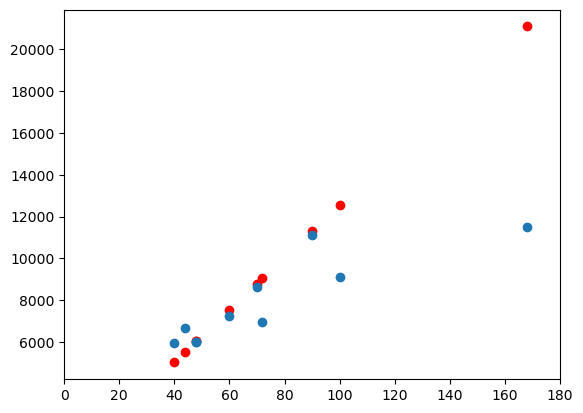

In [120]:
plt.scatter(hours_of_operation,powerpreds, color = 'r')
plt.scatter(hours_of_operation,average_revenue)
plt.xlim(0,180)

(0.0, 180.0)

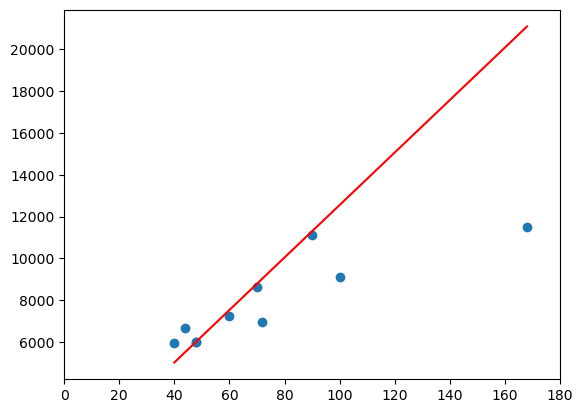

In [105]:
plt.scatter(hours_of_operation,average_revenue)
plt.plot(hours_of_operation,powerpreds, color = 'r')
plt.xlim(0,180)

In [33]:



df = pd.DataFrame(list(zip(hours_of_operation,average_revenue)),columns=['hours','avg_rev'])

x = df['hours'].values.reshape(10,1)
y = df['avg_rev'].values.reshape(10,1)



In [45]:
lr_model = LinearRegression()
lr_model.fit(x,y)

df['preds'] = lr_model.predict(x)
df['error'] = df['preds'] - df['avg_rev']
df['squared_error'] = df['error'] ** 2

In [46]:
df

,hours,avg_rev,preds,error,squared_error
0,40,5958,6317.903345,359.903345,1.295304e+05
1,44,6662,6506.185305,-155.814695,2.427822e+04
2,48,6004,6694.467264,690.467264,4.767450e+05
3,48,6011,6694.467264,683.467264,4.671275e+05
4,60,7250,7259.313142,9.313142,8.673462e+01
5,70,8632,7730.018041,-901.981959,8.135715e+05
6,72,6964,7824.159020,860.159020,7.398735e+05
7,90,11097,8671.427838,-2425.572162,5.883400e+06
8,100,9107,9142.132736,35.132736,1.234309e+03
9,168,11498,12342.926045,844.926045,7.139000e+05


In [77]:
print(f'{lr_model.coef_}x + {lr_model.intercept_}')


[[47.07048984]]x + [4435.08375149]


In [48]:
df['squared_error'].sum()

9249747.557586625

In [40]:
df['error'] = df['preds'] - df['avg_rev']

return (168*model.x + model.y - 11498 == model.r10)

,hours,avg_rev,preds
0,40,5958,6317.903345
1,44,6662,6506.185305
2,48,6004,6694.467264
3,48,6011,6694.467264
4,60,7250,7259.313142
5,70,8632,7730.018041
6,72,6964,7824.159020
7,90,11097,8671.427838
8,100,9107,9142.132736
9,168,11498,12342.926045


In [73]:
nlp_predictor(40)

7527.538615842558

In [38]:
lr_preds[0:,]

array([[ 6317.90334528],
       [ 6506.18530466],
       [ 6694.46726404],
       [ 6694.46726404],
       [ 7259.31314217],
       [ 7730.01804062],
       [ 7824.15902031],
       [ 8671.42783751],
       [ 9142.13273596],
       [12342.9260454 ]])